<a href="https://colab.research.google.com/github/vimalthomas-db/deeplearning/blob/main/MNST_Dataloader_v2_validation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import numpy as np

# Download the dataset
path = kagglehub.dataset_download("hojjatk/mnist-dataset", force_download=True)

# Define data loading functions (unchanged)
def load_mnist_images(filename):
    with open(filename, "rb") as f:
        f.read(16)  # Skip the header (first 16 bytes for images)
        data = np.fromfile(f, dtype=np.uint8)
    return data.reshape(-1, 28 * 28) / 255.0  # Normalize pixel values to [0,1]

def load_mnist_labels(filename):
    with open(filename, "rb") as f:
        f.read(8)  # Skip the header (first 8 bytes for labels)
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Initialize data variables
train_x, train_y, test_x, test_y = None, None, None, None

# List items in the downloaded directory and load data
for item in os.listdir(path):
    item_path = os.path.join(path, item)

    if os.path.isfile(item_path):  # Check if it's a file
        print(f"Found file: {item}")
        if "train-images" in item and item.endswith(".idx3-ubyte"):
            train_x = load_mnist_images(item_path)
        elif "train-labels" in item and item.endswith(".idx1-ubyte"):
            train_y = load_mnist_labels(item_path)
        elif "t10k-images" in item and item.endswith(".idx3-ubyte"):
            test_x = load_mnist_images(item_path)
        elif "t10k-labels" in item and item.endswith(".idx1-ubyte"):
            test_y = load_mnist_labels(item_path)

# Print dataset shapes (if loaded successfully)
if train_x is not None and train_y is not None and test_x is not None and test_y is not None:
    print(f"Train Images Shape: {train_x.shape}, Train Labels Shape: {train_y.shape}")
    print(f"Test Images Shape: {test_x.shape}, Test Labels Shape: {test_y.shape}")
else:
    print("Error: Could not load all necessary data files.")

100%|██████████| 22.0M/22.0M [00:00<00:00, 93.6MB/s]

Extracting files...


Found file: t10k-labels.idx1-ubyte
Found file: train-labels.idx1-ubyte
Found file: train-images.idx3-ubyte
Found file: t10k-images.idx3-ubyte
Train Images Shape: (60000, 784), Train Labels Shape: (60000,)
Test Images Shape: (10000, 784), Test Labels Shape: (10000,)


In [17]:





# Calculate the split index
split_index = int(0.8 * len(train_x))

# Split the training data into training and validation sets
train_x_new, val_x = train_x[:split_index], train_x[split_index:]
train_y_new, val_y = train_y[:split_index], train_y[split_index:]

# Print the shapes of the new datasets
print(f"New Train Images Shape: {train_x_new.shape}, New Train Labels Shape: {train_y_new.shape}")
print(f"Validation Images Shape: {val_x.shape}, Validation Labels Shape: {val_y.shape}")


New Train Images Shape: (48000, 784), New Train Labels Shape: (48000,)
Validation Images Shape: (12000, 784), Validation Labels Shape: (12000,)


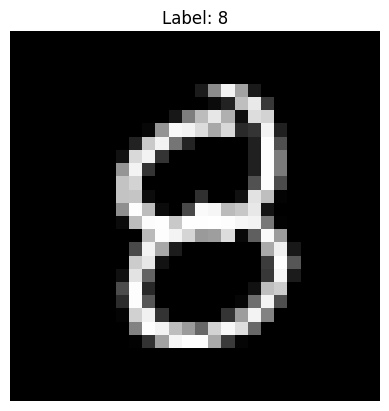

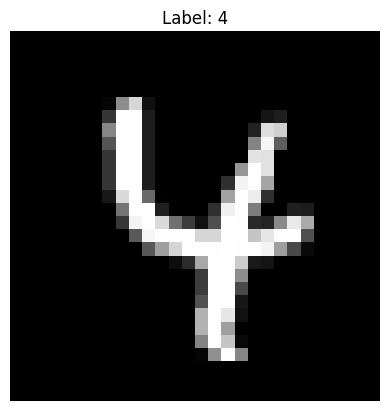

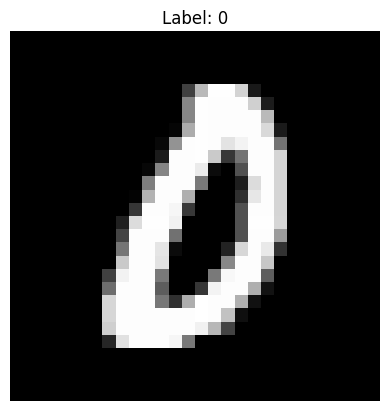

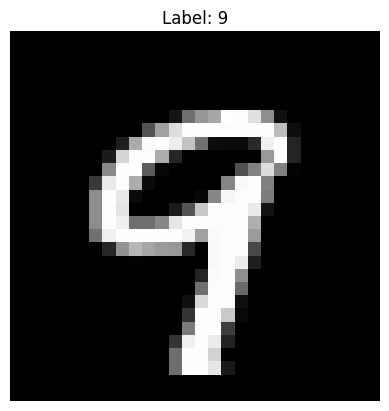

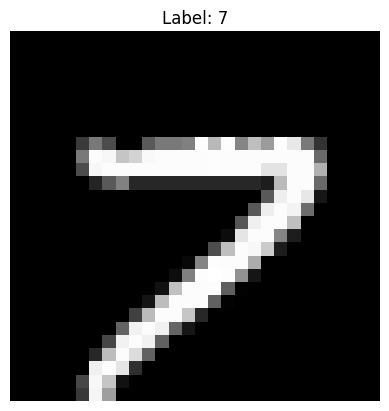

In [18]:
import matplotlib.pyplot as plt

# Function to visualize an image
def show_image(image_vector, label):
    image = image_vector.reshape(28, 28)  # Reshape from (784,) to (28,28)
    plt.imshow(image, cmap="gray")  # Display the image in grayscale
    plt.title(f"Label: {label}")  # Show the corresponding label
    plt.axis("off")  # Hide axes
    plt.show()

# Show 5 random images
num_samples = 5
indices = np.random.choice(len(train_x_new), num_samples, replace=False)  # Random indices

for i in indices:
    show_image(train_x_new[i], train_y[i])  # Show image with corresponding label


In [19]:
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

# Convert labels
train_y_one_hot = one_hot_encode(train_y_new)
val_y_one_hot = one_hot_encode(val_y)

# Print an example
print(f"Example Label: {train_y_new[0]}, One-Hot: {train_y_one_hot[0]}")


Example Label: 5, One-Hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
!git clone https://github.com/vimalthomas/deeplearning.git
%cd deeplearning/

# Run the previous notebook
%run "Multilayerperceptron_drop.ipynb"

Cloning into 'deeplearning'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 147 (delta 6), reused 2 (delta 2), pack-reused 134 (from 1)
Receiving objects: 100% (147/147), 266.85 KiB | 2.75 MiB/s, done.
Resolving deltas: 100% (89/89), done.
/content/deeplearning/deeplearning


In [21]:
# Check the shapes of training and test data
print(f"Train X shape: {train_x_new.shape}, Train Y shape: {train_y_one_hot.shape}")
print(f"Val X shape: {val_x.shape}, Test Y shape: {val_y_one_hot.shape}")


Train X shape: (48000, 784), Train Y shape: (48000, 10)
Val X shape: (12000, 784), Test Y shape: (12000, 10)


In [22]:
training_losses,validation_losses=[],[]

In [23]:
print(training_losses)

[]


In [25]:
# Define the MLP architecture
mlp = MultilayerPerceptron([
    Layer(784, 128, Relu(),dropout_rate=0.1),  # Input (784) → Hidden (128) with ReLU
    Layer(128, 64, Relu(),dropout_rate=0.1),   # Hidden (128) → Hidden (64) with ReLU
    Layer(64, 10, Softmax())  # Hidden (64) → Output (10) with Softmax
])

# Define the loss function
loss_function = CrossEntropy()

# Train the model
training_losses, validation_losses = mlp.train(
    train_x_new, train_y_one_hot,  # Train Data
    val_x, val_y_one_hot,    # Validation Data
    loss_function,
    learning_rate=0.005,
    batch_size=32,
    epochs=50, # Adjust epochs as needed
    model_type='classification'

)

Epoch 1/50 - Training Loss: 0.9952 - Training Acc: 83.57% - Validation Acc: 85.13% - Validation Loss: 0.4281
Epoch 2/50 - Training Loss: 0.4889 - Training Acc: 87.74% - Validation Acc: 88.44% - Validation Loss: 0.3263
Epoch 3/50 - Training Loss: 0.3990 - Training Acc: 89.21% - Validation Acc: 89.84% - Validation Loss: 0.2850
Epoch 4/50 - Training Loss: 0.3506 - Training Acc: 90.39% - Validation Acc: 90.75% - Validation Loss: 0.2556
Epoch 5/50 - Training Loss: 0.3207 - Training Acc: 91.21% - Validation Acc: 92.07% - Validation Loss: 0.2351
Epoch 6/50 - Training Loss: 0.2946 - Training Acc: 91.79% - Validation Acc: 92.12% - Validation Loss: 0.2201
Epoch 7/50 - Training Loss: 0.2737 - Training Acc: 92.43% - Validation Acc: 92.60% - Validation Loss: 0.2048
Epoch 8/50 - Training Loss: 0.2574 - Training Acc: 92.83% - Validation Acc: 93.21% - Validation Loss: 0.1927
Epoch 9/50 - Training Loss: 0.2386 - Training Acc: 93.21% - Validation Acc: 93.57% - Validation Loss: 0.1833
Epoch 10/50 - Train

In [26]:
print(training_losses)

[0.9951988380611765, 0.4889259729165229, 0.3990331923171397, 0.3505521176226411, 0.3207400216532306, 0.29459642461588453, 0.2736873803324858, 0.2573614166378785, 0.23855712071648144, 0.22838530401518484, 0.21901142991192407, 0.2080069392364485, 0.1989091453497603, 0.19077351614105797, 0.18192563430639458, 0.17780809858288596, 0.17146066940830193, 0.16483103055498816, 0.16173713934182707, 0.15553476207008088, 0.14967365712603767, 0.1464062040037534, 0.14385405694153466, 0.13783133274742326, 0.1337066207621015, 0.12966026528970342, 0.127758383030672, 0.12458042995424926, 0.12203798183577538, 0.1182460265389879, 0.11768133626985398, 0.11572277356534556, 0.10985252268845702, 0.10858881843983123, 0.10668343272551715, 0.10285443506115947, 0.1046030915085771, 0.10184254675899614, 0.09869707189527198, 0.09807039835747275, 0.09604850254237679, 0.09287356717512413, 0.09308340410932577, 0.0913690083769792, 0.08879303033825352, 0.08627407459970052, 0.08690041452240804, 0.08503368580743265, 0.08218

In [27]:
# Compute test accuracy
val_accuracy = compute_accuracy(mlp, val_x, val_y_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 96.59%


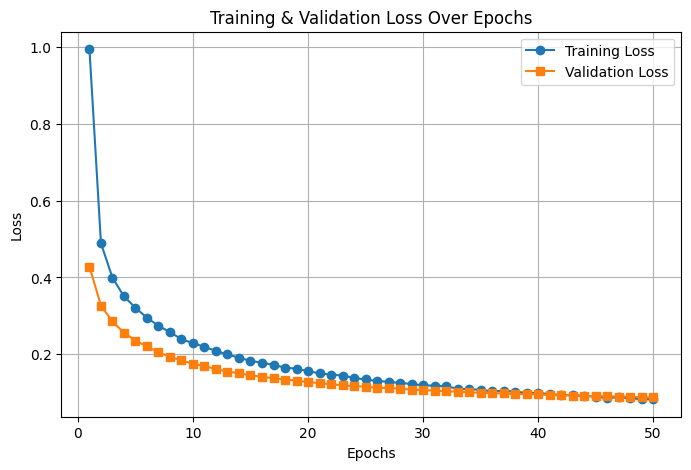

In [28]:
import matplotlib.pyplot as plt

# Function to plot training & validation losses
def plot_losses(training_losses, validation_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(training_losses) + 1), training_losses, label="Training Loss", marker="o")
    plt.plot(range(1, len(validation_losses) + 1), validation_losses, label="Validation Loss", marker="s")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the loss curves
plot_losses(training_losses, validation_losses)


In [29]:
print(training_losses)

[0.9951988380611765, 0.4889259729165229, 0.3990331923171397, 0.3505521176226411, 0.3207400216532306, 0.29459642461588453, 0.2736873803324858, 0.2573614166378785, 0.23855712071648144, 0.22838530401518484, 0.21901142991192407, 0.2080069392364485, 0.1989091453497603, 0.19077351614105797, 0.18192563430639458, 0.17780809858288596, 0.17146066940830193, 0.16483103055498816, 0.16173713934182707, 0.15553476207008088, 0.14967365712603767, 0.1464062040037534, 0.14385405694153466, 0.13783133274742326, 0.1337066207621015, 0.12966026528970342, 0.127758383030672, 0.12458042995424926, 0.12203798183577538, 0.1182460265389879, 0.11768133626985398, 0.11572277356534556, 0.10985252268845702, 0.10858881843983123, 0.10668343272551715, 0.10285443506115947, 0.1046030915085771, 0.10184254675899614, 0.09869707189527198, 0.09807039835747275, 0.09604850254237679, 0.09287356717512413, 0.09308340410932577, 0.0913690083769792, 0.08879303033825352, 0.08627407459970052, 0.08690041452240804, 0.08503368580743265, 0.08218

In [30]:
import numpy as np

# Get predictions on test data
test_y_one_hot = one_hot_encode(test_y)

test_predictions = mlp.forward(test_x,training=False)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_y_one_hot, axis=1)

# Compute per-class accuracy
unique_classes = np.unique(test_true_classes)
for cls in unique_classes:
    cls_mask = test_true_classes == cls
    cls_accuracy = np.mean(test_pred_classes[cls_mask] == test_true_classes[cls_mask]) * 100
    print(f"Accuracy for digit {cls}: {cls_accuracy:.2f}%")


# Calculate overall accuracy
overall_accuracy = np.mean(test_pred_classes == test_true_classes) * 100
print(f"Overall Test Accuracy: {overall_accuracy:.2f}%")


Accuracy for digit 0: 98.67%
Accuracy for digit 1: 99.03%
Accuracy for digit 2: 97.29%
Accuracy for digit 3: 97.52%
Accuracy for digit 4: 98.17%
Accuracy for digit 5: 97.09%
Accuracy for digit 6: 97.39%
Accuracy for digit 7: 96.89%
Accuracy for digit 8: 96.20%
Accuracy for digit 9: 95.64%
Overall Test Accuracy: 97.41%


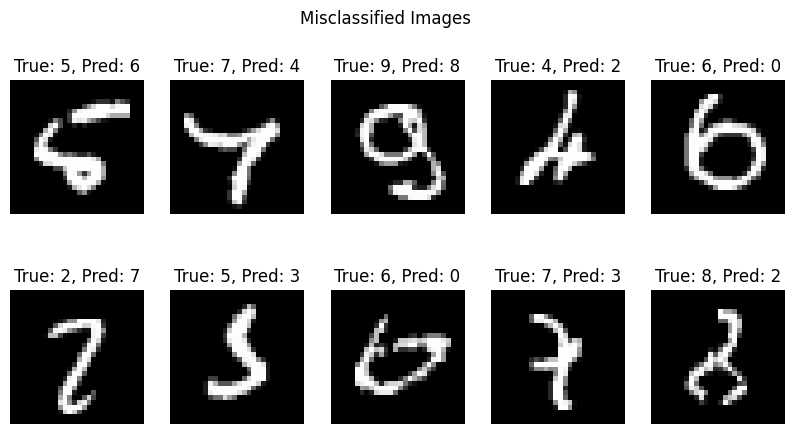

In [31]:
import matplotlib.pyplot as plt


# Find misclassified indices
misclassified = np.where(test_pred_classes != test_true_classes)[0]

# Plot a few misclassified samples
num_samples = 10  # Number of misclassified images to show
plt.figure(figsize=(10, 5))

for i, idx in enumerate(misclassified[:num_samples]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_x[idx].reshape(28, 28), cmap="gray")  # Reshape and display
    plt.title(f"True: {test_true_classes[idx]}, Pred: {test_pred_classes[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Images")
plt.show()


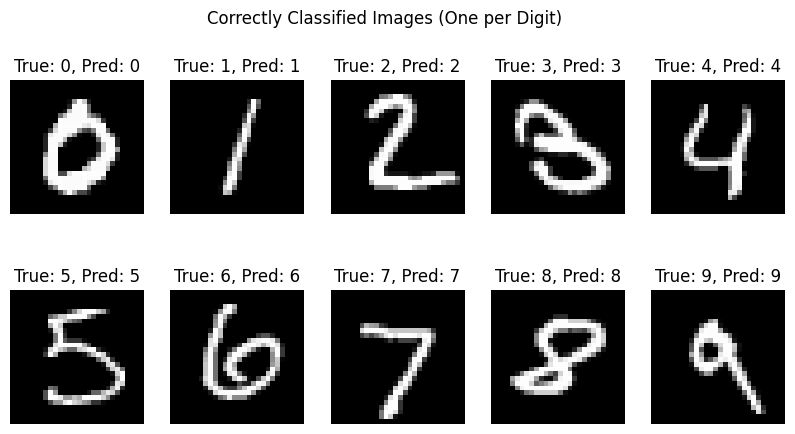

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on test data (if not already done)
# ... (previous code for loading data, training model, and getting predictions)

# Find correctly classified indices for each digit
classified_indices = {}
for digit in range(10):
    classified_indices[digit] = np.where((test_pred_classes == digit) & (test_true_classes == digit))[0]

# Plot one sample for each digit
plt.figure(figsize=(10, 5))
for digit in range(10):
    if len(classified_indices[digit]) > 0:  # Check if there are any correctly classified samples for this digit
        idx = classified_indices[digit][0]  # Take the first correctly classified sample
        plt.subplot(2, 5, digit + 1)
        plt.imshow(test_x[idx].reshape(28, 28), cmap="gray")
        plt.title(f"True: {test_true_classes[idx]}, Pred: {test_pred_classes[idx]}")
        plt.axis("off")
    else:
        print(f"No correctly classified samples found for digit {digit}")

plt.suptitle("Correctly Classified Images (One per Digit)")
plt.show()

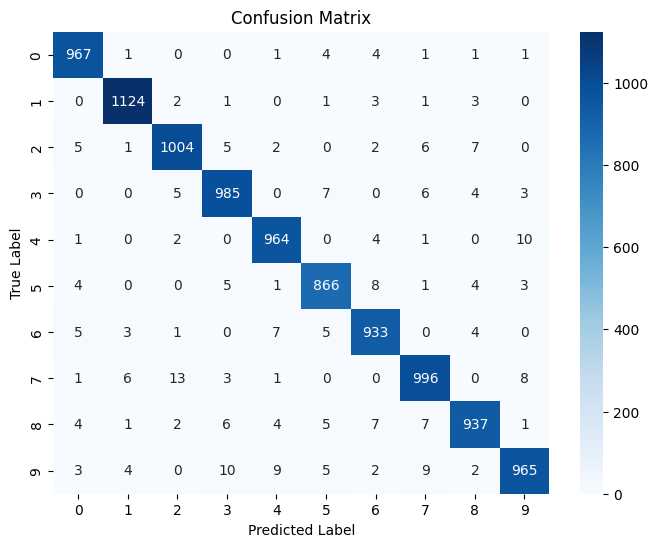

In [35]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
